# CIFAR Conv Net

И так, в этом ноутбуке Вы сделаете превую в своей жизни сверточную сеть! На сложном датасете. Cкачайте его кстати, 

In [2]:
!mkdir cifar10

In [3]:
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0   911k      0  0:03:02  0:03:02 --:--:-- 1532k


In [4]:
!tar -xvzf cifar-10-python.tar.gz -C cifar10

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from cifar import load_CIFAR10
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

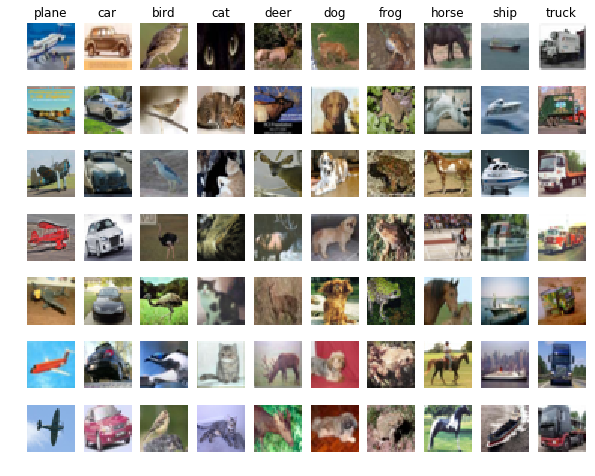

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<h1 align="center">First of all -- Checking Questions</h1> 

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

Когда сверточные сети появились (обработка изображений), они выделяли какие-то обощения в изображениях, потом проводился анализ (автоматической системой решений или человеком) есть ли в этой области искомый объект.
Современные сверточные сети находят объект за нас (могут выдать, например, его размеры и местоположение). Они выдают не только класс, но и параметры.

Также широко применяется сеть, как фильтр. Полученные результаты (изображение, логика) могут быть поданы на вход других алгоритмов. Так, например,видеорегистраторами осуществляется разметка, которой может пользоваться автомобиль для ориентации.

Теперь сверточные нейросети могут решать задачи, которые раньше были достаточно сложны. Например, раскраска чб фотографий, фильмов.


**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

Если догадаться какие признаки выделяют нейросети, можно их "сломать". Существует исследование, в котором нейросеть, которая, в том числе, отличала ягуара от гепарда (как оказалось, по форме пятен), подали на вход диван пятнистой окраски, и она распознала его как ягуара.


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

Проблема переобучения. Можно использовать DropoutLayer,для того, чтобы неросетка обучалась ни на одних и тех же данных.

**Вопрос 4**: Как сделать стайл трансфер для музыки? oO

Преобразовать аудио к картинке, для которой стайл трансфер умеем делать.

a)Музыка - это одномерный массив, длиной $N$. Можно сделать reshape $\sqrt{N} \cdot \sqrt{N}$

б)Оконное преобразование Фурье. Из одномерного сигнала получим спектрограмму. Существуют алгоритмы, по преобразованию спектрограммы обратно в одномерный сигнал (Гриффин-Лим)

При переносе стиля не хотим менять частоты. Свёртки надо делать не $3 * 3$, а $3 * N (K * N)$, чтоб частоты (ось y на спектрограмме не менялась).

In [4]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import *

X = T.tensor4("X")
y = T.vector("y",dtype='int64')

In [5]:
print X_train.shape[0], X_train.shape[1]
print y_train.shape[0]

50000 3
50000


In [6]:
print (X_train[0][0])
print len(X_train[0][0])
print y_train[0]

[[  59.   43.   50. ...,  158.  152.  148.]
 [  16.    0.   18. ...,  123.  119.  122.]
 [  25.   16.   49. ...,  118.  120.  109.]
 ..., 
 [ 208.  201.  198. ...,  160.   56.   53.]
 [ 180.  173.  186. ...,  184.   97.   83.]
 [ 177.  168.  179. ...,  216.  151.  123.]]
32
6


In [7]:
from sklearn.preprocessing import OneHotEncoder
from lasagne import init

### Соберите нейронку: 
- Many times x (Conv+Pool)
- Many small convolutions like 3x3
- Batch Norm 
- Residual Connection
- Data Augmentation 
- Learning rate Schedule 
- ...

### Для вдохновения 
- http://torch.ch/blog/2015/07/30/cifar.html
- https://github.com/szagoruyko/wide-residual-networks 

### Самое интересное
- Для сдачи задания нужно набрать на точность тесте > **92.5**% (это займет много времени, торопитесь :) )
- Для получения бонусных баллов > **95.0**%
- Будет очень хорошо если вы придумаете свою архитектуру или сможете обучить что-то из вышеперечисленного :)
- А для обучения всего этого добра вам будет куда удобнее использовать GPU на Amazon 
    - Инструкция https://github.com/persiyanov/ml-mipt/tree/master/amazon-howto 
    - Вам помогут tmux, CuDNN, ssh tunnel, nvidia-smi, ... 
    - Have fun :)

In [8]:
'''net = lasagne.layers.InputLayer(shape=(None, 3, 32, 32), input_var=X)
net = lasagne.layers.Conv2DLayer(net, 64, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.3) 
net = lasagne.layers.Conv2DLayer(net, 64, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.MaxPool2DLayer(net, 2)

net = lasagne.layers.Conv2DLayer(net, 128, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 128, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.MaxPool2DLayer(net, 2)

net = lasagne.layers.Conv2DLayer(net, 256, 3)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 256, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 256, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.MaxPool2DLayer(net, 2)

net = lasagne.layers.Conv2DLayer(net, 512, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 512, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 512, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.MaxPool2DLayer(net, 2)

net = lasagne.layers.Conv2DLayer(net, 512, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 512, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.4) 
net = lasagne.layers.Conv2DLayer(net, 512, 1)
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.MaxPool2DLayer(net, 2)


net = lasagne.layers.DropoutLayer(net, 0.5)
net = lasagne.layers.DenseLayer(net, num_units=512, nonlinearity=None)  
net = lasagne.layers.BatchNormLayer(net)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.5)
net = lasagne.layers.DenseLayer(net,num_units = 10, nonlinearity=softmax)'''

'net = lasagne.layers.InputLayer(shape=(None, 3, 32, 32), input_var=X)\nnet = lasagne.layers.Conv2DLayer(net, 64, 1)\nnet = lasagne.layers.BatchNormLayer(net)\nnet = lasagne.layers.prelu(net)\nnet = lasagne.layers.DropoutLayer(net, 0.3) \nnet = lasagne.layers.Conv2DLayer(net, 64, 1)\nnet = lasagne.layers.BatchNormLayer(net)\nnet = lasagne.layers.prelu(net)\nnet = lasagne.layers.MaxPool2DLayer(net, 2)\n\nnet = lasagne.layers.Conv2DLayer(net, 128, 1)\nnet = lasagne.layers.BatchNormLayer(net)\nnet = lasagne.layers.prelu(net)\nnet = lasagne.layers.DropoutLayer(net, 0.4) \nnet = lasagne.layers.Conv2DLayer(net, 128, 1)\nnet = lasagne.layers.BatchNormLayer(net)\nnet = lasagne.layers.prelu(net)\nnet = lasagne.layers.MaxPool2DLayer(net, 2)\n\nnet = lasagne.layers.Conv2DLayer(net, 256, 3)\nnet = lasagne.layers.BatchNormLayer(net)\nnet = lasagne.layers.prelu(net)\nnet = lasagne.layers.DropoutLayer(net, 0.4) \nnet = lasagne.layers.Conv2DLayer(net, 256, 1)\nnet = lasagne.layers.BatchNormLayer(net)\

In [9]:
net = lasagne.layers.InputLayer(shape=(None, 3, 32, 32), input_var=X)
net = lasagne.layers.Conv2DLayer(net, 64, 1)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.3) 
net = lasagne.layers.Conv2DLayer(net, 64, 1)
net = lasagne.layers.prelu(net)
net = lasagne.layers.MaxPool2DLayer(net, 2)

net = lasagne.layers.Conv2DLayer(net, 128, 1)
net = lasagne.layers.MaxPool2DLayer(net, 2)
net = lasagne.layers.prelu(net)
net = lasagne.layers.DropoutLayer(net, 0.3)
net = lasagne.layers.Conv2DLayer(net, 256, 1)
net = lasagne.layers.MaxPool2DLayer(net, 2)
net = lasagne.layers.DropoutLayer(net, 0.4)
net = lasagne.layers.DenseLayer(net, num_units=512)
net = lasagne.layers.DropoutLayer(net, 0.5)
net = lasagne.layers.DenseLayer(net,num_units = 10, nonlinearity=softmax)

In [10]:
y_predicted = lasagne.layers.get_output(net)
all_weights = lasagne.layers.get_all_params(net)
print all_weights

[W, b, alpha, W, b, alpha, W, b, alpha, W, b, W, b, W, b]


In [11]:
loss = lasagne.objectives.categorical_crossentropy(y_predicted, y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, y).mean()

In [12]:
updates = lasagne.updates.nesterov_momentum(loss, all_weights, learning_rate=0.001, momentum=0.8)

In [13]:
train_fun = theano.function([X, y], [loss, accuracy], updates=updates)
accuracy_fun = theano.function([X, y], accuracy) # точность без обновления весов, для теста

### Вот и всё, пошли её учить

In [14]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [15]:
print len(X_test), len(y_test)

10000 10000


In [16]:
X_val = X_test[:8000]
y_val = y_test[:8000]
X_test = X_test[8000:]
y_test = y_test[8000:]

# Процесс обучения

In [17]:
import time

num_epochs = 10 #количество проходов по данным
batch_size = 50 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1
    print 'batch', train_batches

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1
    print 'batch', val_batches

    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(val_acc / val_batches * 100))
    
    
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print "Achievement unlocked: колдун 80 уровня"
else:
    print "Нужно больше магии!"

batch 1000
batch 160
Epoch 1 of 10 took 1418.767s
  training loss (in-iteration):		2.510420
  train accuracy:		21.02 %
  validation accuracy:		26.49 %
batch 1000
batch 160
Epoch 2 of 10 took 1394.944s
  training loss (in-iteration):		1.945268
  train accuracy:		28.11 %
  validation accuracy:		29.49 %
batch 1000
batch 160
Epoch 3 of 10 took 1424.734s
  training loss (in-iteration):		1.887331
  train accuracy:		30.67 %
  validation accuracy:		31.51 %
batch 1000
batch 160
Epoch 4 of 10 took 1370.280s
  training loss (in-iteration):		1.842856
  train accuracy:		32.75 %
  validation accuracy:		33.50 %
batch 1000
batch 160
Epoch 5 of 10 took 1390.062s
  training loss (in-iteration):		1.813806
  train accuracy:		33.59 %
  validation accuracy:		34.10 %
batch 1000
batch 160
Epoch 6 of 10 took 1406.059s
  training loss (in-iteration):		1.787737
  train accuracy:		34.78 %
  validation accuracy:		35.11 %
batch 1000
batch 160
Epoch 7 of 10 took 1396.293s
  training loss (in-iteration):		1.766342
  

## Заполните форму

https://goo.gl/forms/EeadABISlVmdJqgr2 